In [52]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

In [53]:
mlp = pd.read_parquet('mlp_results.parquet')
dot = pd.read_parquet('dot_results.parquet')

In [54]:
all_diffs_test = []
all_diffs_fresh = []

embedding_dims = [16, 32, 64, 128]
num_users_ = [4000, 8000, 16000, 32000]
first_layer_mults = [1, 2, 4]
for first_layer_mult in first_layer_mults:
    exp_test = []
    exp_fresh = []
    for embedding_dim in embedding_dims:
        local_test = []
        local_fresh = []
        for num_users in num_users_:
            num_items = num_users
            load_spec_dot_test = f'emb{embedding_dim}_num_u{num_users}_dot_test_rmse'
            load_spec_dot_fresh = f'emb{embedding_dim}_num_u{num_users}_dot_fresh_rmse'
            load_spec_mlp_test = f'emb{embedding_dim}_num_u{num_users}_layer_m{first_layer_mult}_mlp_test_rmse'
            load_spec_mlp_fresh = f'emb{embedding_dim}_num_u{num_users}_layer_m{first_layer_mult}_mlp_fresh_rmse'
            
            mlp_item_test = mlp.loc[mlp.index==load_spec_mlp_test].values.item()
            mlp_item_fresh = mlp.loc[mlp.index==load_spec_mlp_fresh].values.item()
            dot_item_test = dot.loc[dot.index==load_spec_dot_test].values.item()
            dot_item_fresh = dot.loc[dot.index==load_spec_dot_fresh].values.item()
            
            diff_test = abs(mlp_item_test - dot_item_test)
            diff_fresh = abs(mlp_item_fresh - dot_item_fresh)
            
            local_test.append(diff_test)
            local_fresh.append(diff_fresh)
        exp_test.append(local_test)
        exp_fresh.append(local_fresh)
    all_diffs_test.append(exp_test)
    all_diffs_fresh.append(exp_fresh)
        
            

In [57]:
x_coords = [2, 4, 6, 8, 10, 12]
x_labels = ['4000', '8000', '16000', '32000', '64000', '128000']
labels=['d=16', 'd=32', 'd=64', 'd=128']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

layers_f = ['[2d, 1d, 0.5d]', '[4d, 2d, 1d]', '[8d, 4d, 2d]']

/Users/sergekulesh/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


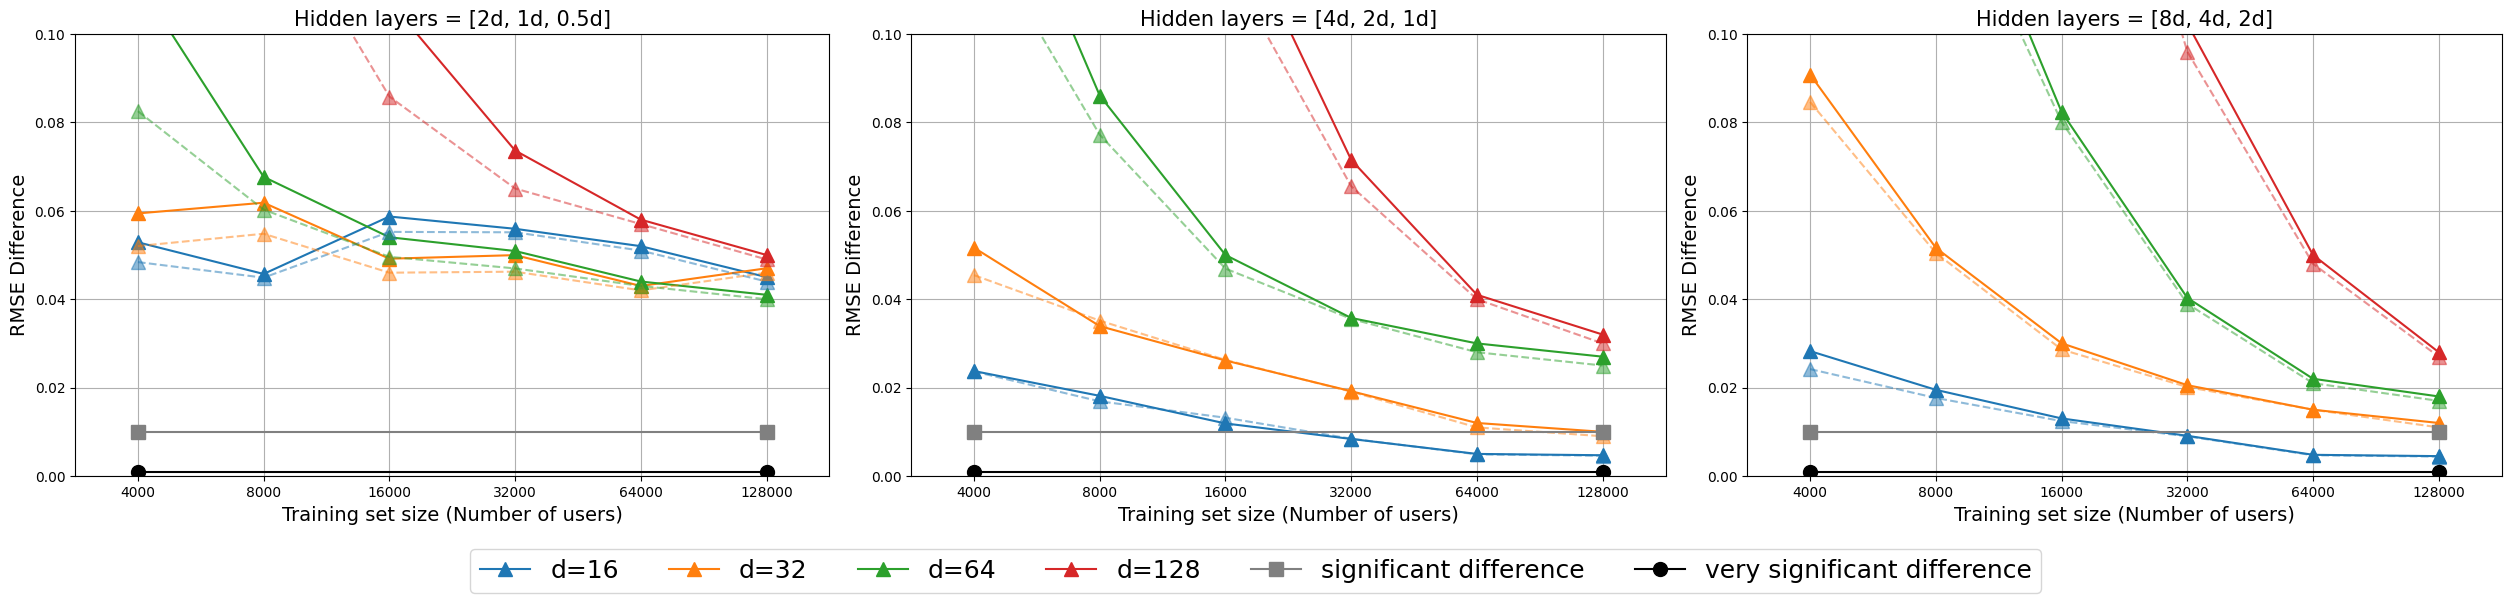

In [60]:
fig = plt.figure(constrained_layout=True, figsize=(25, 10))
plt.style.use('default')
spec = gridspec.GridSpec(ncols=6, nrows=6, figure=fig)
exps = []
for k in range(3):
    exp = fig.add_subplot(spec[0:3, 0 + k*2:2 + k*2])
    exp.set_title(f'Hidden layers = {layers_f[k]}', fontsize=15)
    for i, test in enumerate(all_diffs_fresh[k]):
        exp.plot(x_coords, test, marker="^", ms=10, label=labels[i], c = colors[i])
    
    for j, fresh in enumerate(all_diffs_test[k]):
        exp.plot(x_coords, fresh, marker="^", ms=10, linestyle='dashed', alpha=.5, c = colors[j])
        
    exp.plot([2, 12], [0.01, 0.01], label='significant difference', color='gray', marker='s', ms=10)
    exp.plot([2, 12], [0.001, 0.001], label='very significant difference', color='black', marker='o', ms=10)
    
    xlabels = [item.get_text() for item in exp.get_xticklabels()]
    xlabels[1:] = x_labels

    exp.set_xlim([1, 13])
    exp.set_ylim([0, 0.1])
    exp.set_xticklabels(xlabels)

    exp.set_xlabel('Training set size (Number of users)', fontsize=14)
    exp.set_ylabel('RMSE Difference', fontsize=14)
    
    exps.append(exp)
    
for mg in exps:
    mg.grid()
    
handles, labels = exps[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.0, 0.4, 1.0, 0.1), fontsize=18, ncol=6)
plt.show()